# Load Data and Libraries 

In [44]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [10]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("datasets_228_482_diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Process

In [15]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
pima=pima.dropna()

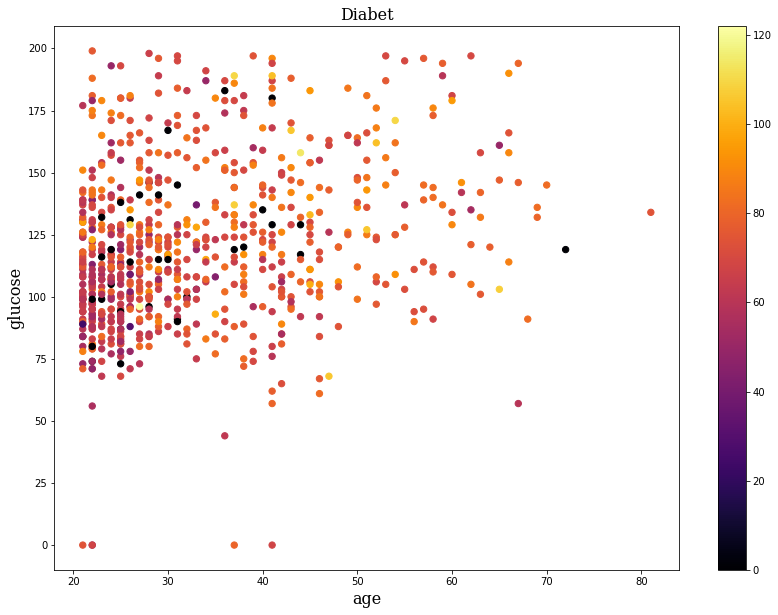

In [20]:

fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (14,10)

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 16,
        }

plt.scatter(x=pima['age'], y=pima['glucose'], c=pima['bp'], s=40, cmap='inferno')
plt.title("Diabet",
          fontdict=font)
plt.xlabel("age", fontdict=font)
plt.ylabel("glucose", fontdict=font)
color_bar = plt.colorbar()
plt.show()

# Create train and test dataset 

In [35]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Fit and Train Decision Tree

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [39]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [53]:
clf.predict_log_proba(np.array([list(X_test.values[0])]))

c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:948: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


array([[  0., -inf]])

In [56]:
y_test.values[0]

0

# Tree Visualization  

In [8]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


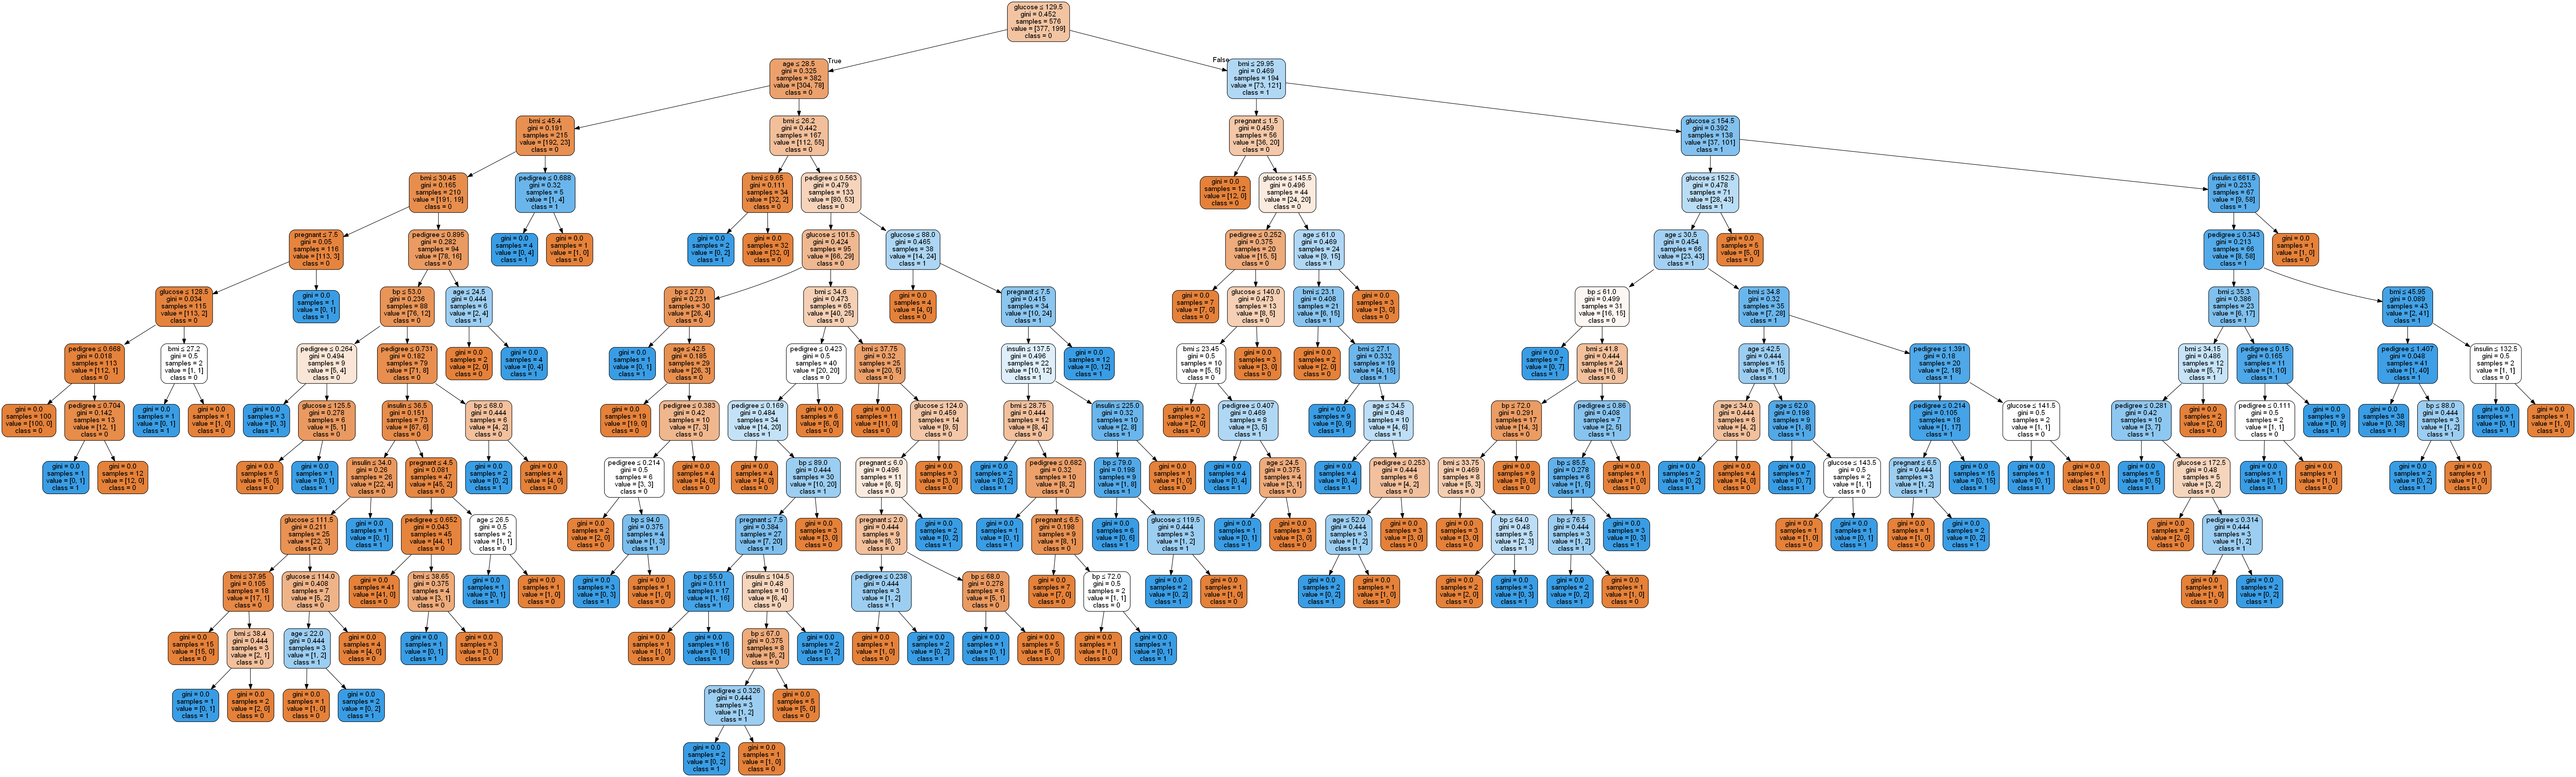

In [9]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Correlatin between Features 

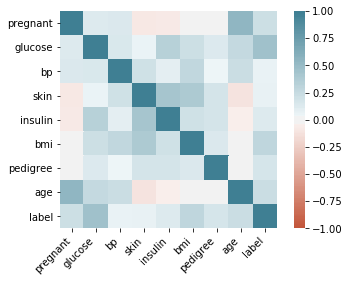

In [14]:
import seaborn as sns
data = pd.read_csv("datasets_228_482_diabetes.csv", header=None, names=col_names)

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Regressor Tree

In [23]:
tree = DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)
tree.fit(X_train, y_train)
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=3,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort=False,
                      random_state=0, splitter='best')

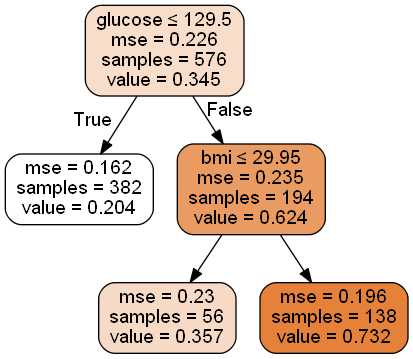

In [57]:
dot_data = export_graphviz(tree,
                           feature_names=feature_cols,class_names=['0','1'],
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
nodes = graph.get_node_list()

graph.write_png('python_decision_tree.png')
Image(graph.create_png())

# Regions in Decision Trees

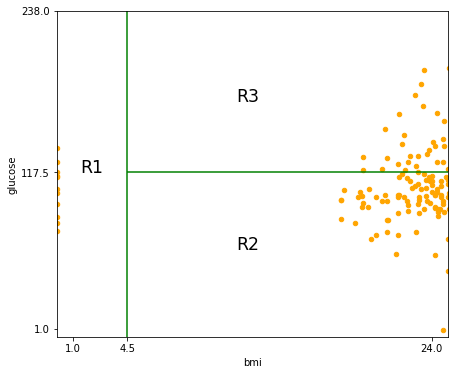

In [33]:
pima.plot('bmi', 'glucose', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(bottom=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250, colors="green")
plt.hlines(117.5, xmin=4.5, xmax=25, colors="green")
plt.annotate('R1', xy=(1.5,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11.5,60), fontsize='xx-large')
plt.annotate('R3', xy=(11.5,170), fontsize='xx-large');

In [25]:
pima.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')